# Homework 2 - Exercise 2

## Emma Parois

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loss function (or energy function) and its derivatives with respect to weights and threshold

In [2]:
def loss_function(targets, outputs):
    return 1/2 * ((targets - outputs)**2).sum()

In [3]:
def loss_function_derivative_weights(percept, input_patterns, targets):
    return (
        -1/2 
        * input_patterns.T
        * percept.derivative_activation_function(input_patterns)
        * (targets - percept.activation_function(input_patterns)))

In [4]:
def loss_function_derivative_thresholds(percept, input_patterns, targets):
    return (
        1/2 
        * percept.derivative_activation_function(input_patterns)
        * (targets - percept.activation_function(input_patterns)))

### Perceptron to train

In [5]:
class Perceptron:
    def __init__(self, D):
        self.weights = 0.4*np.random.rand(D, 1) - 0.2
        self.threshold = 2*np.random.rand() - 1
        
    def local_field(self, input_pattern):
        return -self.threshold + self.weights.T @ input_pattern.T
        
    def activation_function(self, input_pattern):
        return np.tanh(1/2 * self.local_field(input_pattern))
    
    def derivative_activation_function(self, input_pattern):
        return 1/2 * (1 - np.tanh(1/2 * self.local_field(input_pattern))**2)

### Gradient descent for an input pattern

In [6]:
def gradient_descent(percept, input_pattern, target):    
    gradient_weights = loss_function_derivative_weights(percept, input_pattern, target)
    gradient_thresholds = loss_function_derivative_thresholds(percept, input_pattern, target)
    return gradient_weights, gradient_thresholds

### Learning loop to determine weights and threshold thanks to gradient descent

In [7]:
def learning(percept, input_patterns, targets, max_update, LR):
    loss_variation = np.empty(0)
    p = input_patterns.shape[0]

    for i in range(max_update):
        idx = i%p
        input_pattern = input_patterns[idx, :].reshape((1, input_patterns.shape[1]))
        target = targets[:,idx]

        grad_weights, grad_threshold = gradient_descent(percept, input_pattern, target)

        percept.weights = percept.weights - LR * grad_weights
        percept.threshold = percept.threshold - LR * grad_threshold

        loss_variation = np.append(
            loss_variation, 
            [loss_function(targets, percept.activation_function(input_patterns))], 
            axis=0)

    if (np.sign(percept.activation_function(input_patterns)) == targets).all():
        return True, loss_variation
        
    return False, loss_variation

### Determine whether a 4D-Boolean function is lenearly separable or not by training a perceptron

In [8]:
def is_linearly_separable(input_patterns, targets, D, max_update, LR, nb_learnings=10):
    percept = Perceptron(D) 
    i = 0
    
    answer, loss_variation = learning(percept, input_patterns, targets, max_update, LR)
    
    if not answer:
        while i < nb_learnings and not answer:
            answer, new_loss_variation = learning(percept, input_patterns, targets, max_update, LR)
            loss_variation = np.concatenate((loss_variation, new_loss_variation))
            i += 1
    
    return answer, loss_variation

### Parameters used for learnings

In [9]:
D = 4
input_patterns = np.genfromtxt('input_data_numeric.csv', delimiter=',')
input_patterns = np.delete(input_patterns, 0, 1)
LR = 0.02
max_update = 100000

### Function D

In [10]:
targets_D = np.array([[-1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1]])

In [11]:
answer_D, loss_variation_D = is_linearly_separable(input_patterns, targets_D, D, max_update, LR)

#### Function D is linearly separable : 

In [12]:
answer_D

True

#### Plot of the variation of the loss function

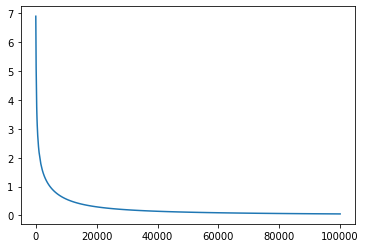

In [13]:
plt.plot(loss_variation_D)

### Function E

In [14]:
targets_E = np.array([[1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1]])

In [15]:
answer_E, loss_variation_E = is_linearly_separable(input_patterns, targets_E, D, max_update, LR)

#### Function E is linearly separable : 

In [16]:
answer_E

True

#### Plot of the variation of the loss function

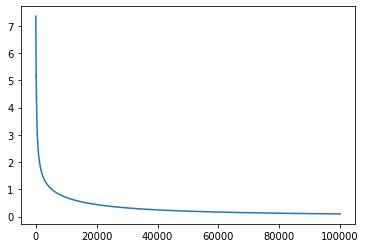

In [17]:
plt.plot(loss_variation_E)

### Function C

In [18]:
targets_C = np.array([[1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1]])

In [19]:
answer_C, loss_variation_C = is_linearly_separable(input_patterns, targets_C, D, max_update, LR)

#### Function C is linearly separable : 

In [20]:
answer_C

True

#### Plot of the variation of the loss function

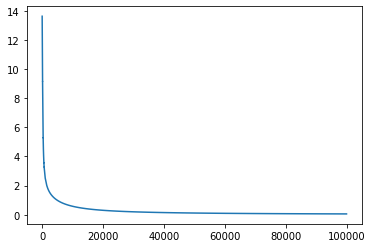

In [21]:
plt.plot(loss_variation_C)

### Function A

In [22]:
targets_A = np.array([[-1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1]]) 

In [23]:
answer_A, loss_variation_A = is_linearly_separable(input_patterns, targets_A, D, max_update, LR)

#### Function A is linearly separable : 

In [24]:
answer_A

False

#### Plot of the variation of the loss function

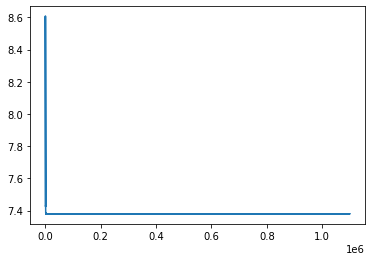

In [25]:
plt.plot(loss_variation_A)

### Function B

In [26]:
targets_B = np.array([[1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1]])

In [27]:
answer_B, loss_variation_B = is_linearly_separable(input_patterns, targets_B, D, max_update, LR)

#### Function B is linearly separable : 

In [28]:
answer_B

False

#### Plot of the variation of the loss function

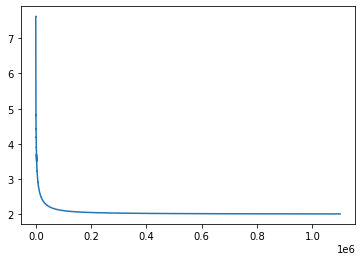

In [29]:
plt.plot(loss_variation_B)

### Function F

In [30]:
targets_F = np.array([[1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1]])

In [31]:
answer_F, loss_variation_F = is_linearly_separable(input_patterns, targets_F, D, max_update, LR)

#### Function F is linearly separable : 

In [32]:
answer_F

False

#### Plot of the variation of the loss function

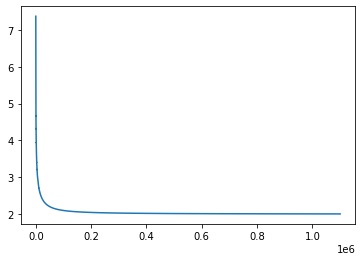

In [33]:
plt.plot(loss_variation_F)